# Sweetness Prediction using lasso and ridge

In [79]:
# loading libraries 
library(glmnet)
library(caTools)

In [80]:
# Reading data
sp <- read.csv("C:/Users/Shubham Shukla/Desktop/internship/new/sweetness_prediction/ecfp.csv")

In [81]:
# Splitting data into training and testing set

split <- sample.split(sp$Sweetness, SplitRatio = 0.75)
train <- subset(sp, split == T)
test <- subset(sp, split == F)

In [82]:
train <- subset(train, select = -c(smiles))

In [83]:
test <- subset(test, select = -c(smiles))

In [84]:
testx <- model.matrix(Sweetness ~. -1, data = test)
testy <- test$Sweetness

In [85]:
# Converting into matrix 

x <- model.matrix(Sweetness ~. -1, data = train)
y <- train$Sweetness

### Using ridge

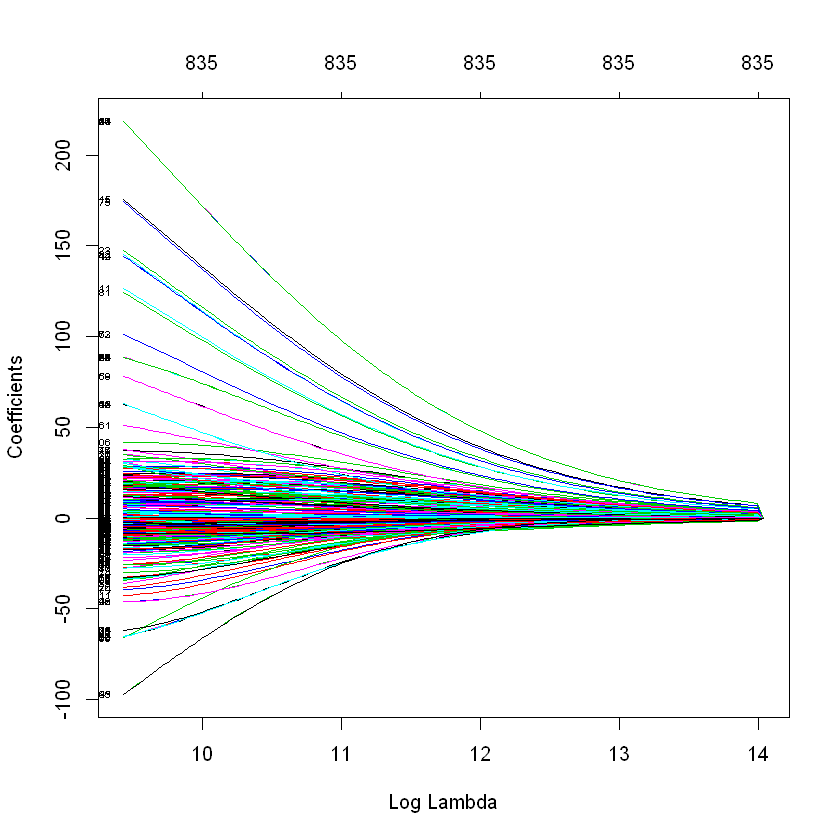

In [86]:
fit.ridge <- glmnet(x,y, alpha = 0)
plot(fit.ridge, xvar = "lambda", label = T)

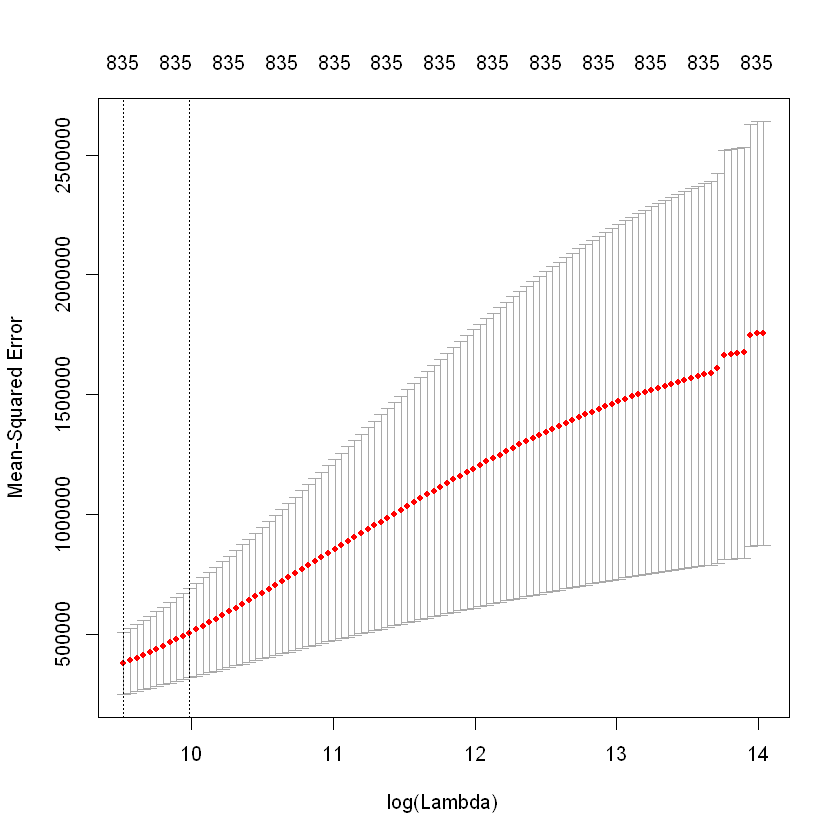

In [87]:
# CV for ridge 

cv.ridge <- cv.glmnet(x,y, alpha = 0)
plot(cv.ridge)

### Using lasso

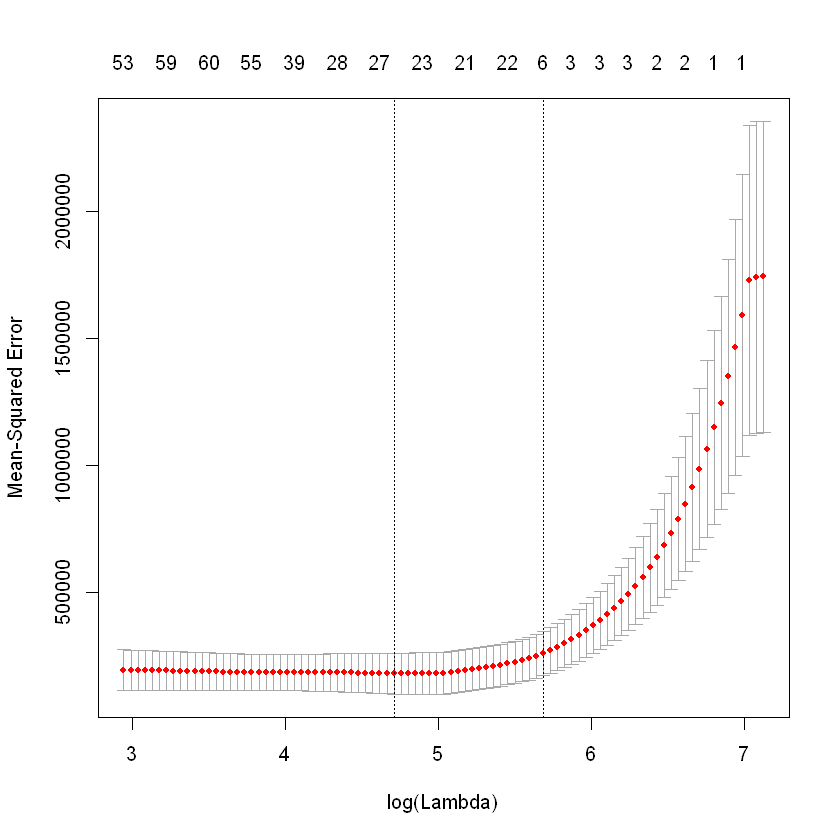

In [88]:
cv.lasso <- cv.glmnet(x,y, alpha = 1, nlambda = 100)
plot(cv.lasso)

In [89]:
# Model fitting using lasso 

fit <- glmnet(x,y, alpha = 1, lambda = cv.lasso$lambda.1se)

In [90]:
fit


Call:  glmnet(x = x, y = y, alpha = 1, lambda = cv.lasso$lambda.1se) 

     Df   %Dev Lambda
[1,]  8 0.8805  295.1

In [91]:
model.predict <- predict(fit,testx)
nrow(model.predict)

[1] 44

In [92]:
sse <- sum((model.predict - testy)^2)
sst <- sum((testy - mean(testy))^2)

r_sq <- 1 - (sse/sst)

In [93]:
r_sq

[1] 0.9283419